<h1 align='center'>
    Jacobiano do Manipulador PUMA 260
<h1>

<div align="center">
    <img src="puma260.png">
</div>

In [1]:
import numpy as np
from FKM import *

### Definição da Tabela de Denavit Hartenberg:

In [2]:
puma = Robot((
    [theta1, 13, 0, rad(90)],
    [theta2, 3, 8, 0],
    [theta3+rad(90), 0, 0, rad(90)],
    [theta4, 8, 0, rad(-90)],
    [theta5-rad(90), 0, 0, rad(-90)],
    [theta6, 4, 0, 0]
))

### $$\text{Obtenção de } o_i^0 \text{ :}$$

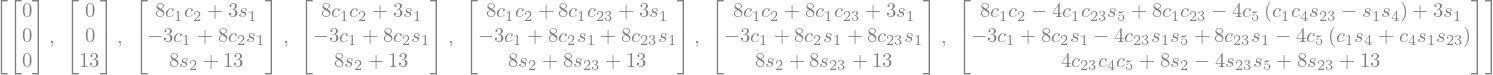

In [3]:
n = len(puma.T) #número de juntas

o = [Matrix([[0], [0], [0]])]
for i in range(1, n+1):
    o.append(simplify(puma.HTM(0, i)[:3, 3]))

o

### $$\text{Obtenção de } Z_{i-1}^0 = R_{i-1}^0k \text{ :}$$

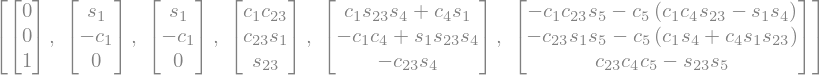

In [4]:
z = [Matrix([[0], [0], [1]])]
for i in range(1, n):
    z.append(simplify(puma.HTM(0, i)[:3, 2]))

z

### $$\text{Obtenção do Jacobiano de velocidades lineares } J_{v_i} = z_{i-1}^0 \times \left( o_n^0 - o_{i-1}^0 \right) \text{ :}$$

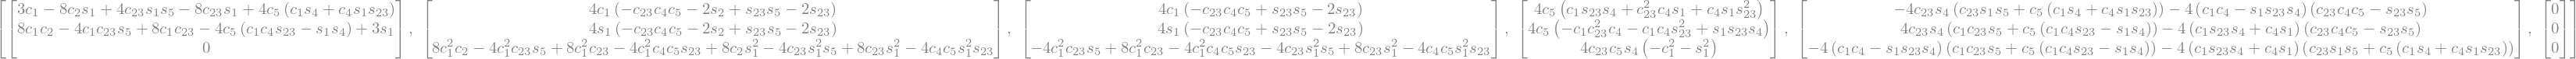

In [5]:
jv = []
for i in range(1, n+1):
    if(puma.rotational[i-1]):
        jv.append(simplify(Matrix(np.cross(np.squeeze(z[i-1]), np.squeeze(o[-1] - o[i-1])).tolist())))
    else:
        jv.append(simplify(z[i-1]))

jv

### $$\text{Obtenção do Jacobiano de velocidades angulares } J_{\omega_i} = z_{i-1}^0 \text{ :}$$

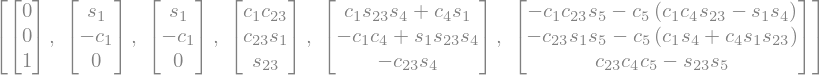

In [6]:
jw = []
for i in range(1, n+1):
    if(puma.rotational[i-1]):
        jw.append(simplify(z[i-1]))
    else:
        jw.append(Matrix([[0], [0], [0]]))

jw

### $$\text{Obtenção do Jacobiano de velocidades completo, tal que } \xi = J(q)\dot{q} \text{ :}$$

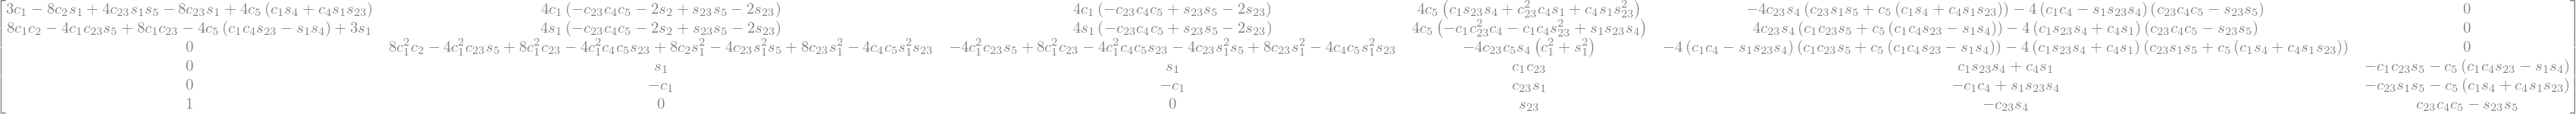

In [7]:
J = []
for k in range(3):
    J.append([])
    for i in range(n):
        J[k].append(simplify(jv[i][k]))
for k in range(3):
    J.append([])
    for i in range(n):
        J[k+3].append(simplify(jw[i][k]))

Matrix(J)

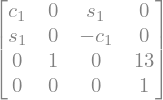

In [10]:
puma.HTM(0, 1)

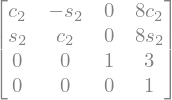

In [11]:
puma.HTM(1, 2)

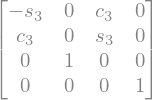

In [12]:
puma.HTM(2, 3)

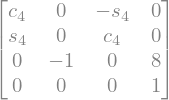

In [13]:
puma.HTM(3, 4)

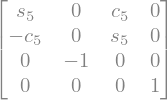

In [14]:
puma.HTM(4, 5)

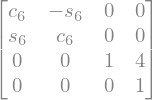

In [15]:
puma.HTM(5, 6)

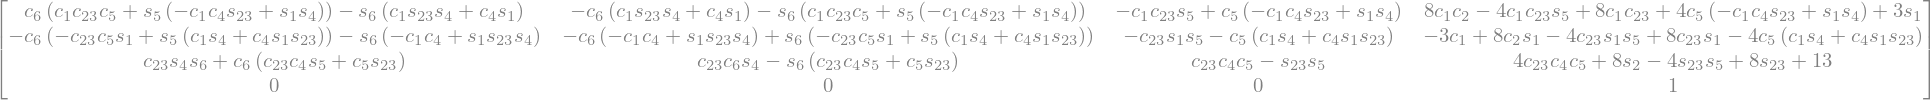

In [18]:
puma.HTM(0, 6)